In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import re
import plotly.express as px
import seaborn as sns
from sklearn import linear_model
from wordcloud import WordCloud
from tabulate import tabulate
from skimage import io
from matplotlib.ticker import FormatStrFormatter

In [2]:
# Set plot graph size and style , word font of the graph,...
sns.set(rc = {'figure.figsize':(24,13.5)}, font_scale = 1.3)
plt.figure(figsize = (24,13.5))
plt.style.use('ggplot')

<Figure size 1728x972 with 0 Axes>

In [3]:
# Real all 3 datasets from the data we crawled in shopee_data_crawler
product_id = pd.read_excel("D:/Shopee_DienThoai/data.xlsx", sheet_name = 'ID')
product_data = pd.read_excel("D:/Shopee_DienThoai/data.xlsx", sheet_name = 'DATA')
product_rating = pd.read_excel("D:/Shopee_DienThoai/data.xlsx", sheet_name = 'RATING')

In [4]:
product_id.head()

item_id    shop_id    shop_location  \
0  6685849255   65589552  TP. Hồ Chí Minh   
1  1236186398    1657913           Hà Nội   
2  9764742653  453347243  TP. Hồ Chí Minh   
3  6602136609   70094786  TP. Hồ Chí Minh   
4  7297413303   65589552  TP. Hồ Chí Minh   

                                                name  
0  [Mã ELBAU1TR giảm 5% ] Điện Thoại Samsung Gala...  
1  Điện Thoại Nokia 101,Nokia 100, Nokia 105 Zin ...  
2  Điện thoại TECNO POVA2 (4GB+64GB) - Hàng chính...  
3  Điện Thoại Siêu Dễ Thương Mini BM10 Thay Đổi G...  
4  [Mã ELBAU1TR giảm 5% ] Điện thoại Samsung Gala...

In [5]:
product_data.head()

item_id    shop_id    brand  sold_quantity  stock  discount_price  \
0  6685849255   65589552  SAMSUNG          16339   2979    289000000000   
1  1236186398    1657913    nokia          20415  27946      9900000000   
2  9764742653  453347243    TECNO            683   2168    399000000000   
3  6602136609   70094786      NaN          13655     48     19500000000   
4  7297413303   65589552  SAMSUNG           3270    232    439000000000   

   original_price discount  liked_count  rating_star  number_of_ratings  \
0    349000000000      17%         4585     4.941713               2859   
1     11000000000      10%        32526     4.649601               6274   
2               0      NaN          860     4.898734                316   
3     24500000000      20%         1269     4.859521               3436   
4    589000000000      25%        13409     4.921875                770   

                                  product_image_link  
0  https://cf.shopee.vn/file/132b023a3114a559d723...  
1  https://cf.shopee.vn/file/3a7fe3513b59468fc5d3...  
2  https://cf.shopee.vn/file/a474488f5387c63543fe...  
3  https://cf.shopee.vn/file/22ac0bf9b42272b91701...  
4  https://cf.shopee.vn/file/de40f4e661f2064711bf...

In [6]:
product_rating.head()

item_id         order_id      cmt_id           user_name  \
0  6685849255  112539818117052  9103860935             g*****4   
1  6685849255  111058415139684  8953928762        giacquanthu6   
2  6685849255  109996550130678  8930604293         lntientrung   
3  6685849255  110883295199542  8924673029  molinguyen30011992   
4  6685849255  106117412399209  8547042012          w7uvt877vs   

                                             comment  rating_star  
0  Chất lượng sản phẩm:tốt\nTính năng nổi bật:tốt...            3  
1  Hàng Ok, đóng gói cẩn thận, nhìn chắc chắn đan...            5  
2  Điện thoại rất tốt, pin trâu, đủ dùng cho các ...            5  
3  Mua cho ba\nĐặt màu đen giao màu xanh\nThôi cứ...            4  
4  Chất lượng sản phẩm:Tốt\nTính năng nổi bật:Pin...            5

In [7]:
# First of all, let's start with the product_id dataset

In [8]:
product_id.duplicated().sum()

0

In [9]:
product_id.isnull().sum()

item_id          0
shop_id          0
shop_location    0
name             0
dtype: int64

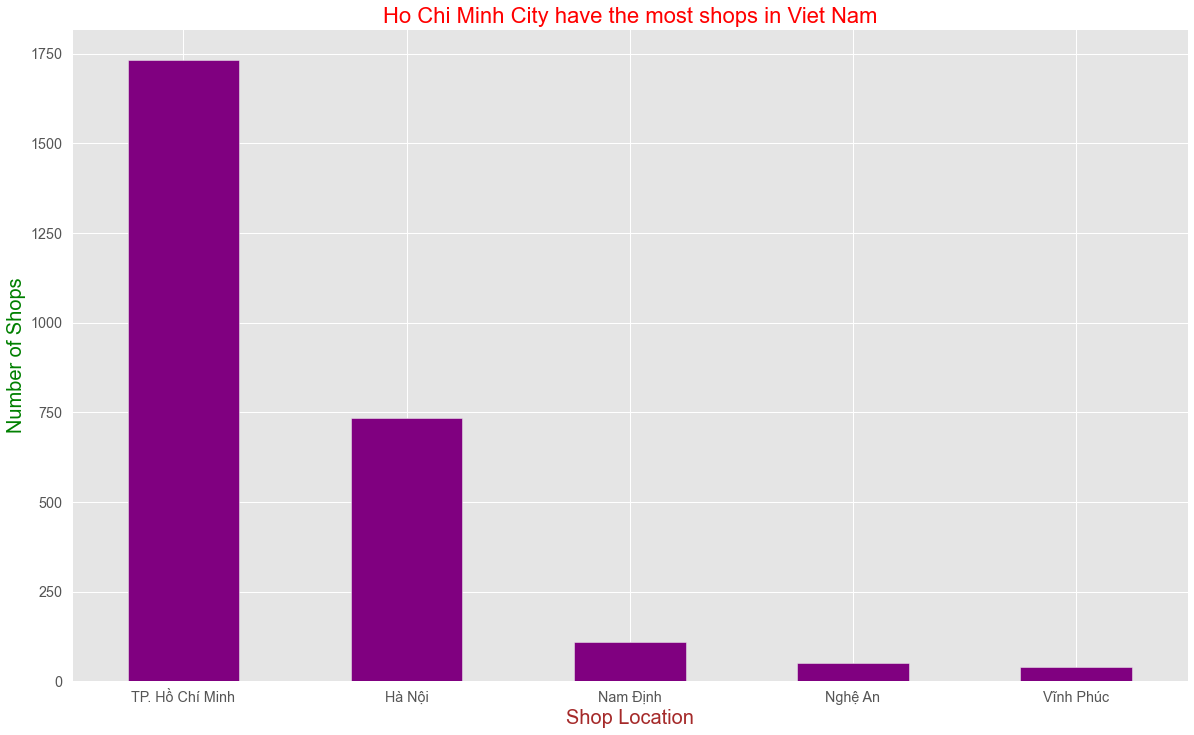

In [10]:
# Top 5 most popular locations where shop's sellers are located 
# Ho Chi Minh have the most shops all over the country, approximately more than 2 times higher than another big city, Ha Noi
# If you live in HCM City, you will likely to receive your orders faster than Ha Noi Citadel
product_id.shop_location.value_counts().head(5).plot.bar(figsize = (20,12), color = 'purple')
plt.xlabel('Shop Location', fontsize = 20, color = 'brown')
plt.ylabel('Number of Shops', fontsize = 20, color = 'green')
plt.title('Ho Chi Minh City have the most shops in Viet Nam', fontsize = 22, color = 'red')
plt.xticks(rotation = 0)
plt.show()

In [11]:
# Merge two datasets 
product_full = pd.merge(product_id, product_data, how = 'left')

In [12]:
product_full

item_id    shop_id    shop_location  \
0      6685849255   65589552  TP. Hồ Chí Minh   
1      1236186398    1657913           Hà Nội   
2      9764742653  453347243  TP. Hồ Chí Minh   
3      6602136609   70094786  TP. Hồ Chí Minh   
4      7297413303   65589552  TP. Hồ Chí Minh   
...           ...        ...              ...   
3055    796686826   48782032  TP. Hồ Chí Minh   
3056    786597488   48782032  TP. Hồ Chí Minh   
3057   3741337691   48782032  TP. Hồ Chí Minh   
3058  12347907444   48406301           Hà Nội   
3059  11371344688  134675802        Bình Định   

                                                   name    brand  \
0     [Mã ELBAU1TR giảm 5% ] Điện Thoại Samsung Gala...  SAMSUNG   
1     Điện Thoại Nokia 101,Nokia 100, Nokia 105 Zin ...    nokia   
2     Điện thoại TECNO POVA2 (4GB+64GB) - Hàng chính...    TECNO   
3     Điện Thoại Siêu Dễ Thương Mini BM10 Thay Đổi G...      NaN   
4     [Mã ELBAU1TR giảm 5% ] Điện thoại Samsung Gala...  SAMSUNG   
...                                                 ...      ...   
3055  LG G3 NEW 99% FULLBOX RAM3 CHÍNH HÃNG BẢO H...      NaN   
3056  LG G3 NEW 99% RAM3//BẢO HÀNH 12 THÁNG//SHIP...      NaN   
3057  điện thoại LG G3 "LG G3 F400 - LG G3 CAT6 { RA...       LG   
3058  Điện thoại Samsung Galaxy Z Flip 3 5G ( Z Flip...  SAMSUNG   
3059               Điện thoại Nokia 1661 đã qua sử dụng    nokia   

      sold_quantity  stock  discount_price  original_price discount  \
0             16339   2979    289000000000    349000000000      17%   
1             20415  27946      9900000000     11000000000      10%   
2               683   2168    399000000000               0      NaN   
3             13655     48     19500000000     24500000000      20%   
4              3270    232    439000000000    589000000000      25%   
...             ...    ...             ...             ...      ...   
3055            130    250    180000000000               0      NaN   
3056            130     69    119000000000               0      NaN   
3057            120    480    125000000000               0      NaN   
3058              6    199   1599000000000   2499000000000      37%   
3059              8      2      9000000000               0      NaN   

      liked_count  rating_star  number_of_ratings  \
0            4585     4.941713               2859   
1           32526     4.649601               6274   
2             860     4.898734                316   
3            1269     4.859521               3436   
4           13409     4.921875                770   
...           ...          ...                ...   
3055           42     5.000000                  2   
3056           43     5.000000                  2   
3057          610     5.000000                  2   
3058          197     5.000000                  4   
3059            0     4.166667                  6   

                                     product_image_link  
0     https://cf.shopee.vn/file/132b023a3114a559d723...  
1     https://cf.shopee.vn/file/3a7fe3513b59468fc5d3...  
2     https://cf.shopee.vn/file/a474488f5387c63543fe...  
3     https://cf.shopee.vn/file/22ac0bf9b42272b91701...  
4     https://cf.shopee.vn/file/de40f4e661f2064711bf...  
...                                                 ...  
3055  https://cf.shopee.vn/file/2c8610dc9dd80510981c...  
3056  https://cf.shopee.vn/file/74a2d42d39430fc9cfdd...  
3057  https://cf.shopee.vn/file/202c599f53d33f07ff56...  
3058  https://cf.shopee.vn/file/a0bd098c211df60bb0d3...  
3059  https://cf.shopee.vn/file/c6ef4f59473ddda2c315...  

[3060 rows x 14 columns]

In [13]:
product_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3060 entries, 0 to 3059
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   item_id             3060 non-null   int64  
 1   shop_id             3060 non-null   int64  
 2   shop_location       3060 non-null   object 
 3   name                3060 non-null   object 
 4   brand               2166 non-null   object 
 5   sold_quantity       3060 non-null   int64  
 6   stock               3060 non-null   int64  
 7   discount_price      3060 non-null   int64  
 8   original_price      3060 non-null   int64  
 9   discount            1288 non-null   object 
 10  liked_count         3060 non-null   int64  
 11  rating_star         3060 non-null   float64
 12  number_of_ratings   3060 non-null   int64  
 13  product_image_link  3060 non-null   object 
dtypes: float64(1), int64(8), object(5)
memory usage: 358.6+ KB


In [14]:
product_full.isnull().sum()

item_id                  0
shop_id                  0
shop_location            0
name                     0
brand                  894
sold_quantity            0
stock                    0
discount_price           0
original_price           0
discount              1772
liked_count              0
rating_star              0
number_of_ratings        0
product_image_link       0
dtype: int64

In [15]:
# There are products that doesn't have Brand, I shall class them "Unknown" 
# Also the product's price has unused 5 zero in the end, let's remove it
product_full.brand = product_full.brand.str.upper()
product_full.brand = product_full.brand.fillna("UNKNOWN")
product_full.original_price = (product_full.original_price / 100000).astype(int)
product_full.discount_price = (product_full.discount_price / 100000).astype(int)

In [16]:
# Some products have [Mã ELBAU1TR giảm 5% ] ( further informations), let's remove it
product_full.name

0       [Mã ELBAU1TR giảm 5% ] Điện Thoại Samsung Gala...
1       Điện Thoại Nokia 101,Nokia 100, Nokia 105 Zin ...
2       Điện thoại TECNO POVA2 (4GB+64GB) - Hàng chính...
3       Điện Thoại Siêu Dễ Thương Mini BM10 Thay Đổi G...
4       [Mã ELBAU1TR giảm 5% ] Điện thoại Samsung Gala...
                              ...                        
3055    LG G3 NEW 99% FULLBOX RAM3 CHÍNH HÃNG BẢO H...
3056    LG G3 NEW 99% RAM3//BẢO HÀNH 12 THÁNG//SHIP...
3057    điện thoại LG G3 "LG G3 F400 - LG G3 CAT6 { RA...
3058    Điện thoại Samsung Galaxy Z Flip 3 5G ( Z Flip...
3059                 Điện thoại Nokia 1661 đã qua sử dụng
Name: name, Length: 3060, dtype: object

In [17]:
for i in range(0,len(product_full.name)):
    product_full.name[i] = re.sub("\(.*?\)|\[.*?\]","",product_full.name[i])

C:\Users\Hung Pham\AppData\Local\Temp\ipykernel_2824\889285104.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_full.name[i] = re.sub("\(.*?\)|\[.*?\]","",product_full.name[i])


In [18]:
product_full.name # Nice and Tidy

0        Điện Thoại Samsung Galaxy M12  - Hãng Phân Ph...
1       Điện Thoại Nokia 101,Nokia 100, Nokia 105 Zin ...
2               Điện thoại TECNO POVA2  - Hàng chính hãng
3       Điện Thoại Siêu Dễ Thương Mini BM10 Thay Đổi G...
4                          Điện thoại Samsung Galaxy A22 
                              ...                        
3055    LG G3 NEW 99% FULLBOX RAM3 CHÍNH HÃNG BẢO H...
3056    LG G3 NEW 99% RAM3//BẢO HÀNH 12 THÁNG//SHIP...
3057    điện thoại LG G3 "LG G3 F400 - LG G3 CAT6 { RA...
3058    Điện thoại Samsung Galaxy Z Flip 3 5G  Hàng ch...
3059                 Điện thoại Nokia 1661 đã qua sử dụng
Name: name, Length: 3060, dtype: object

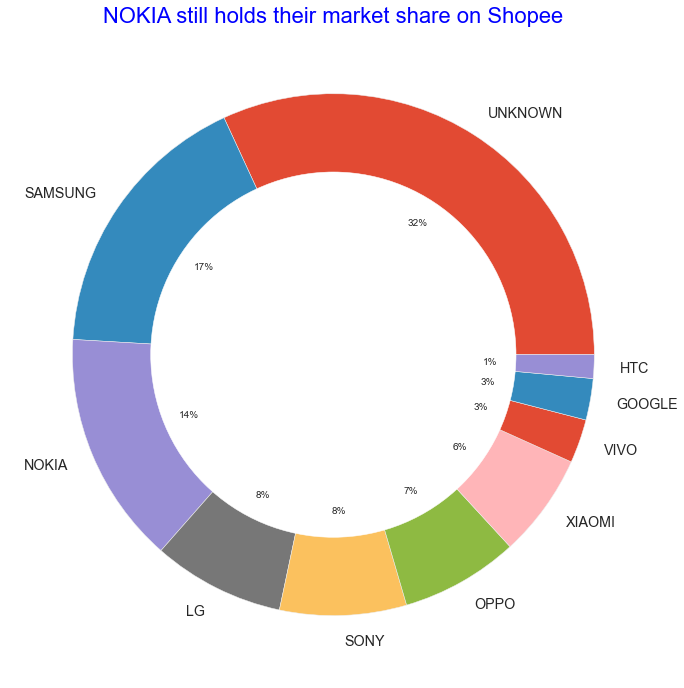

In [19]:
# Let's see how many products each brand has ( except some unknown brand product)
product_full.brand.value_counts().head(10).plot.pie(figsize = (20,12), autopct = "%1.0f%%")
white_circle = plt.Circle((0,0), 0.7, color = 'white')
p = plt.gcf()
p.gca().add_artist(white_circle)
plt.ylabel('')
plt.title('NOKIA still holds their market share on Shopee', fontsize = 22, color = 'blue')
plt.show()

In [20]:
brand_sold = product_full[['brand','sold_quantity']].groupby('brand').sum().sort_values('sold_quantity', ascending = False)[1:len('sold_quantity')].reset_index()

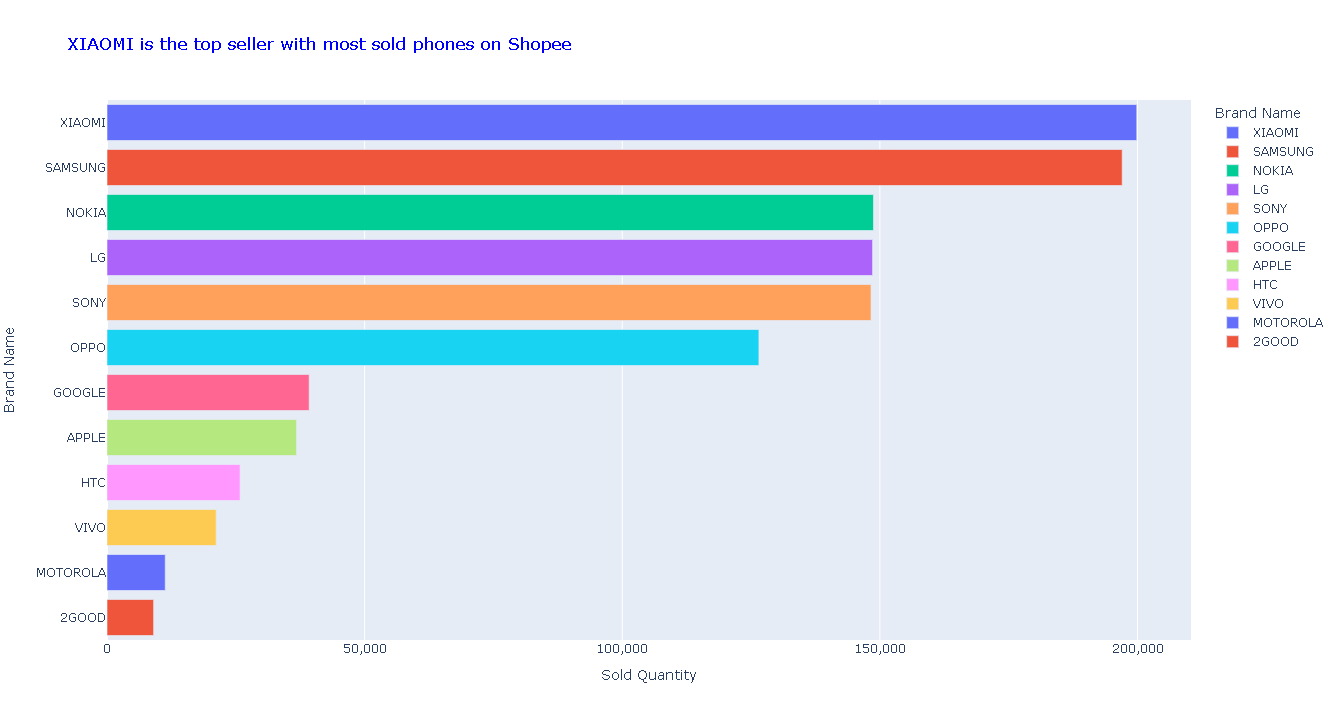

In [21]:
# Xiaomi phone's strength is cheap and good by reviewers, no suprise to see this brand is the most popular among phone brands
# Samsung is very close to Xiaomi in terms of sold quantity
ax = px.bar(brand_sold, x = 'sold_quantity', y = 'brand', color = 'brand',
            title = 'XIAOMI is the top seller with most sold phones on Shopee',
            labels = dict(sold_quantity = 'Sold Quantity', brand = 'Brand Name'),
            width = 1280, height = 720)
ax.update_layout(xaxis_tickformat = ',',title_font_color = "blue")
ax.show()

In [22]:
gross = (product_full.sold_quantity * product_full.discount_price).tolist()
product_full.insert(loc = 11,column = 'gross', value = gross)
brand_gross = product_full[['brand','gross']].groupby('brand').sum('gross').sort_values('gross', ascending = False).reset_index().head(10)

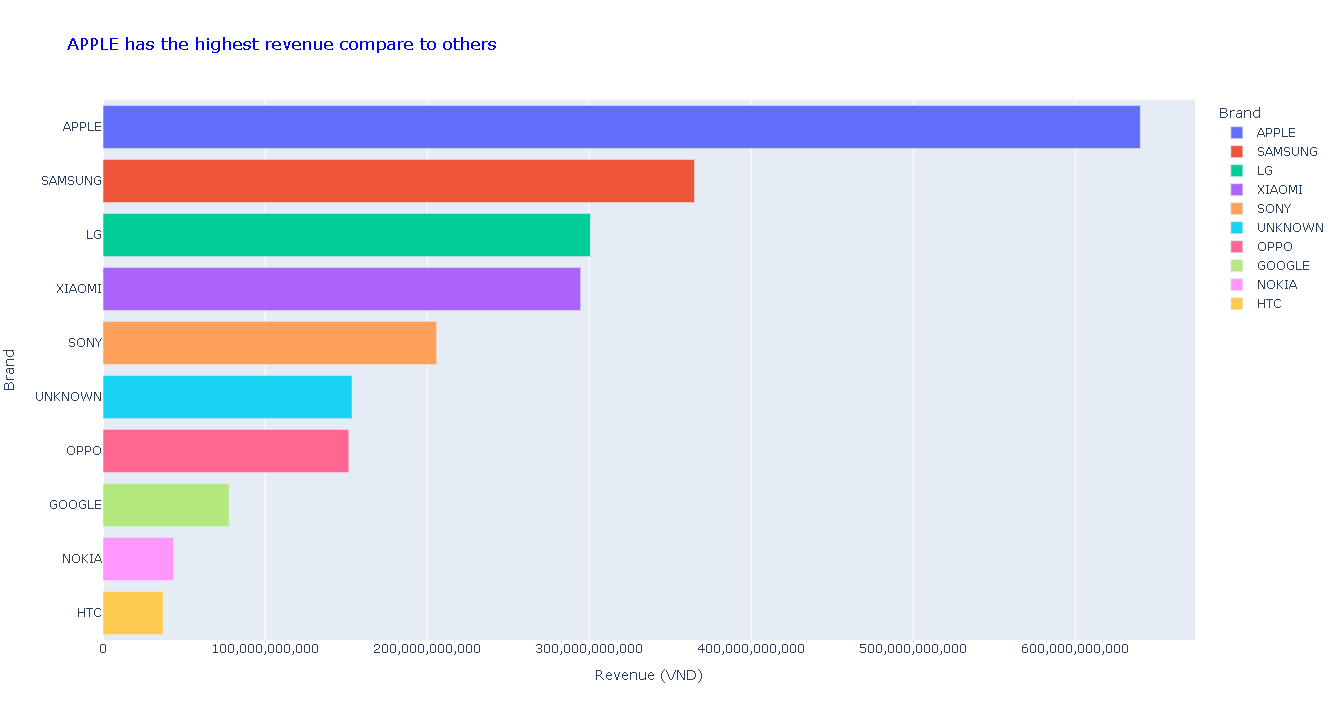

In [23]:
# Wow, It's Apple, Apple's revenue reached over 600 billion VND, approximately 2 times Samsung's revenue.
# And Xiaomi's revenue is a bit less than 300 billion VND, still good enough for its brand, cheap and less profit, but more value for customers
# Nokia is the top 3 by sold quantity, but total revenue is only around 80 billion, so I could guess that Nokia's phone price is very cheap
ax = px.bar(brand_gross, x = 'gross', y = 'brand', color = 'brand',
            title = 'APPLE has the highest revenue compare to others',
            labels = dict(gross = 'Revenue (VND)', brand = 'Brand'),
            width = 1280, height = 720)
ax.update_layout(xaxis_tickformat = ',',title_font_color = "blue")
ax.show()

In [24]:
product_full.rating_star = product_full.rating_star.round(1)

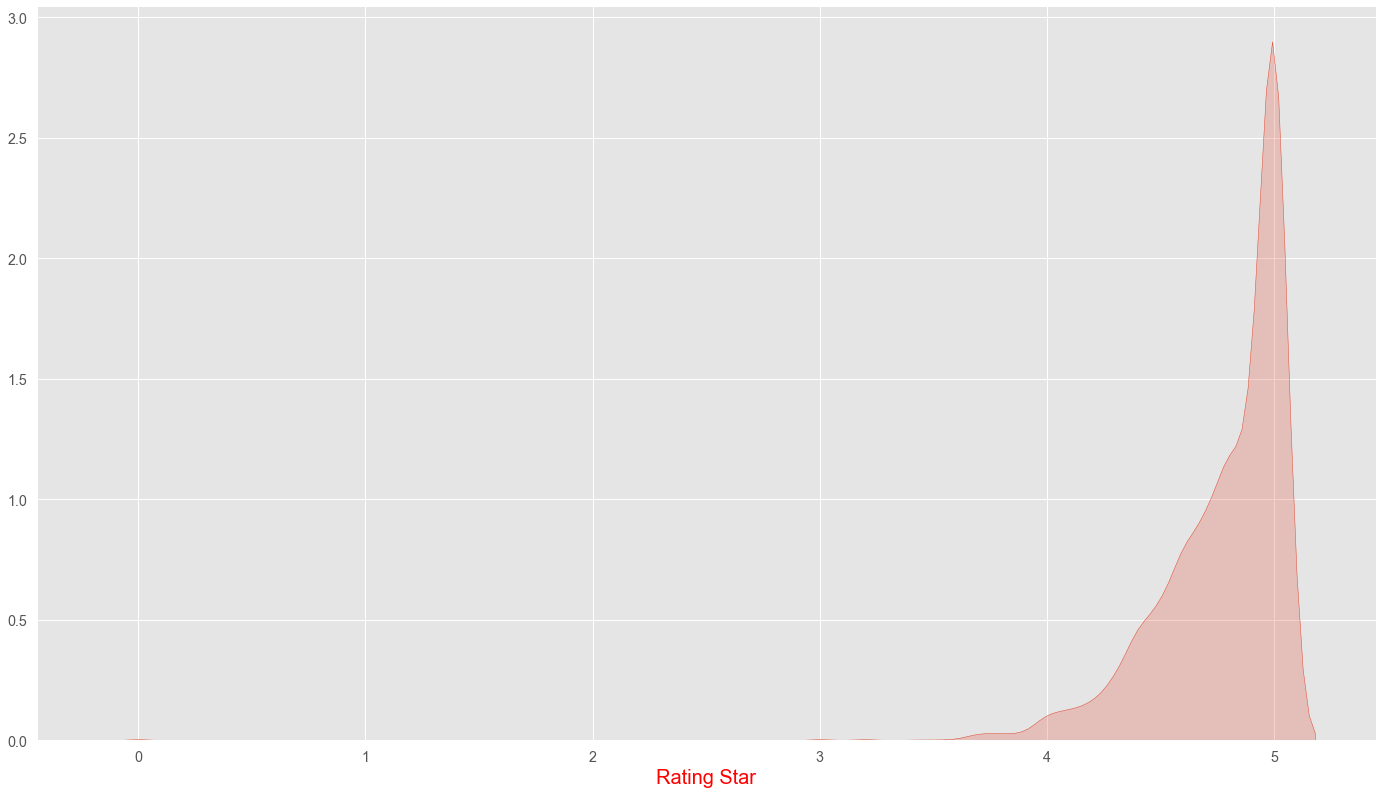

In [25]:
# Almost all products have rating stars over 4, so on average we can expect a product has a rating of 4 stars.
sns.kdeplot(product_full.rating_star, shade = True)
plt.xlabel('Rating Star', fontsize = 20, color = 'red')
plt.ylabel('')
plt.show()

In [26]:
# Top 5 products based on number of ratings
top_5_product_most_rated = product_full.sort_values(['number_of_ratings'], ascending = False)[['name','brand','number_of_ratings']].head(5)

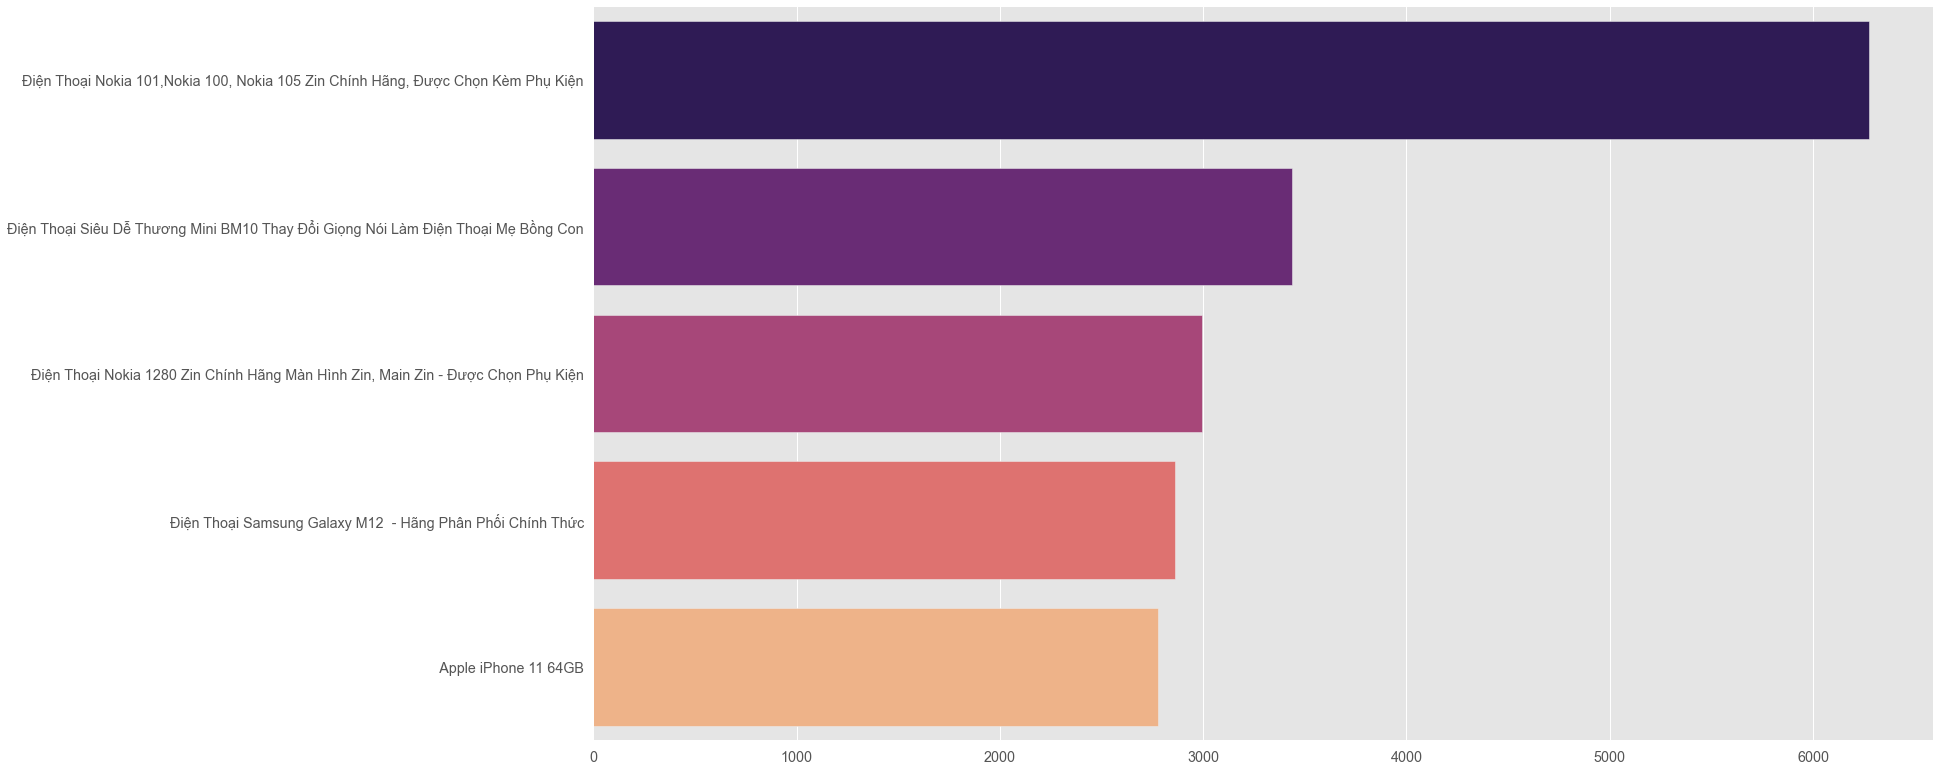

In [27]:
ax = sns.barplot(x = top_5_product_most_rated.number_of_ratings, y = top_5_product_most_rated.name, palette = 'magma')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [28]:
# Top 5 most sold products 
top_5_product_sold = product_full.sort_values('sold_quantity', ascending = False)[['name','brand','sold_quantity']].head(5)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 9733 (\N{BLACK STAR}) missing from current font.



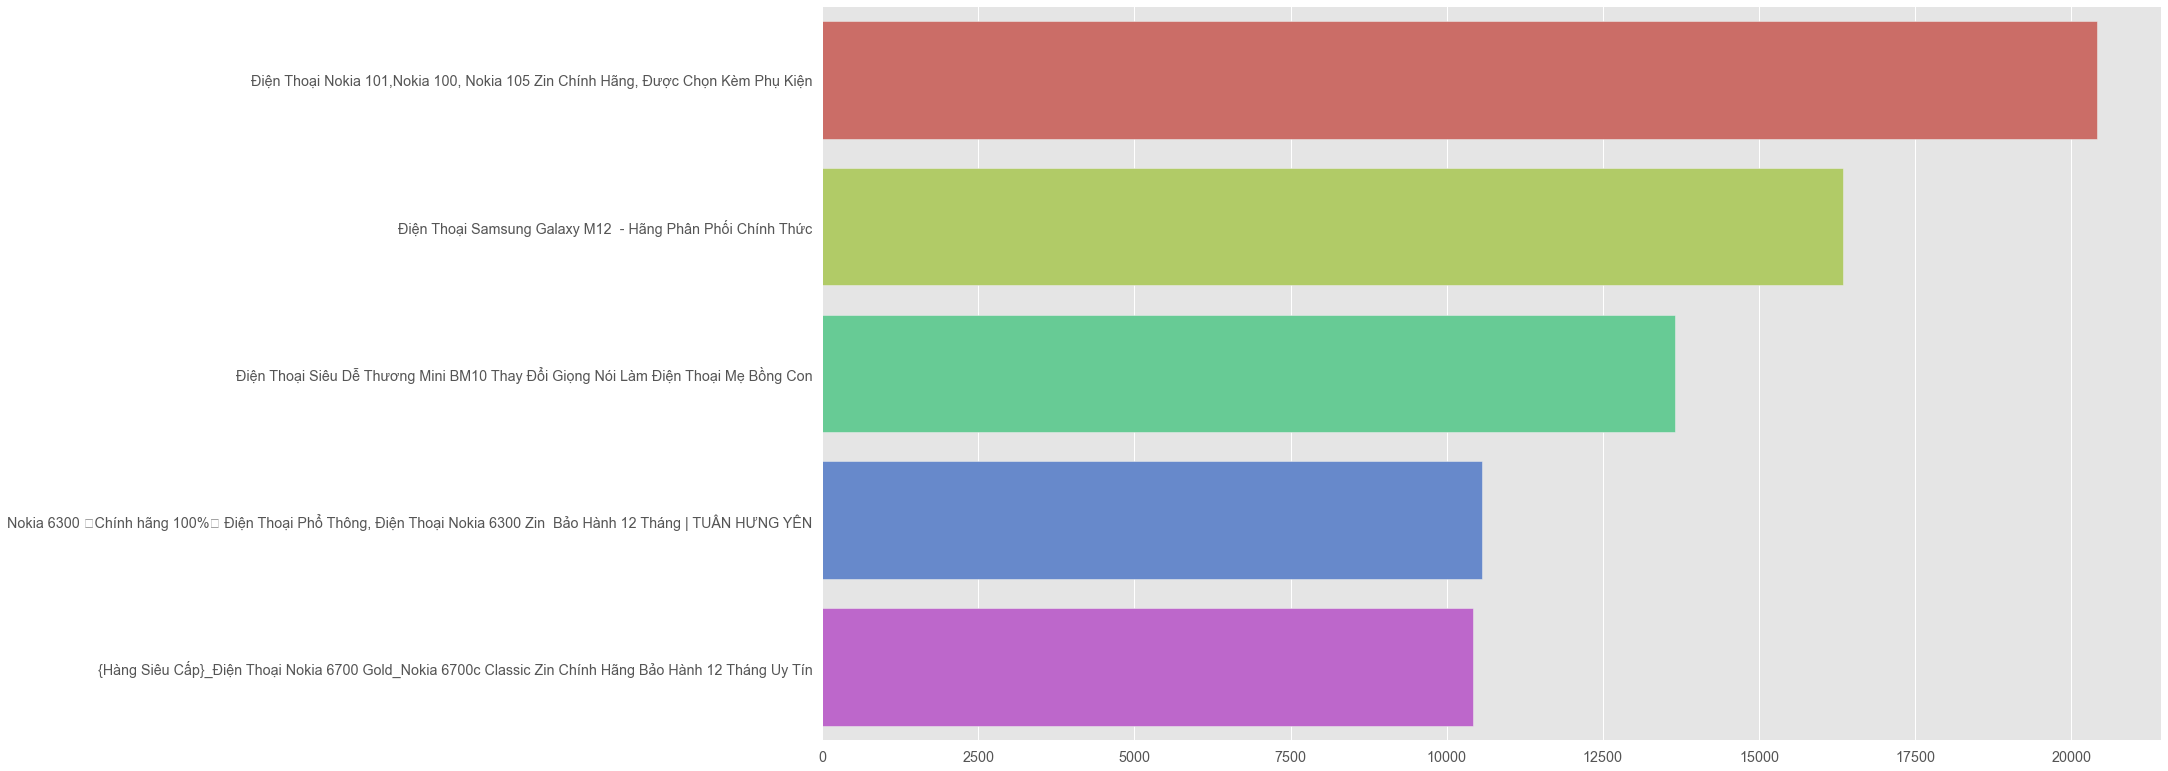

In [29]:
ax = sns.barplot(x = top_5_product_sold.sold_quantity, y = top_5_product_sold.name, palette = 'hls')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [30]:
# Top 5 most liked products
top_5_product_liked = product_full.sort_values('liked_count', ascending = False)[['name','brand','liked_count']].head(5)

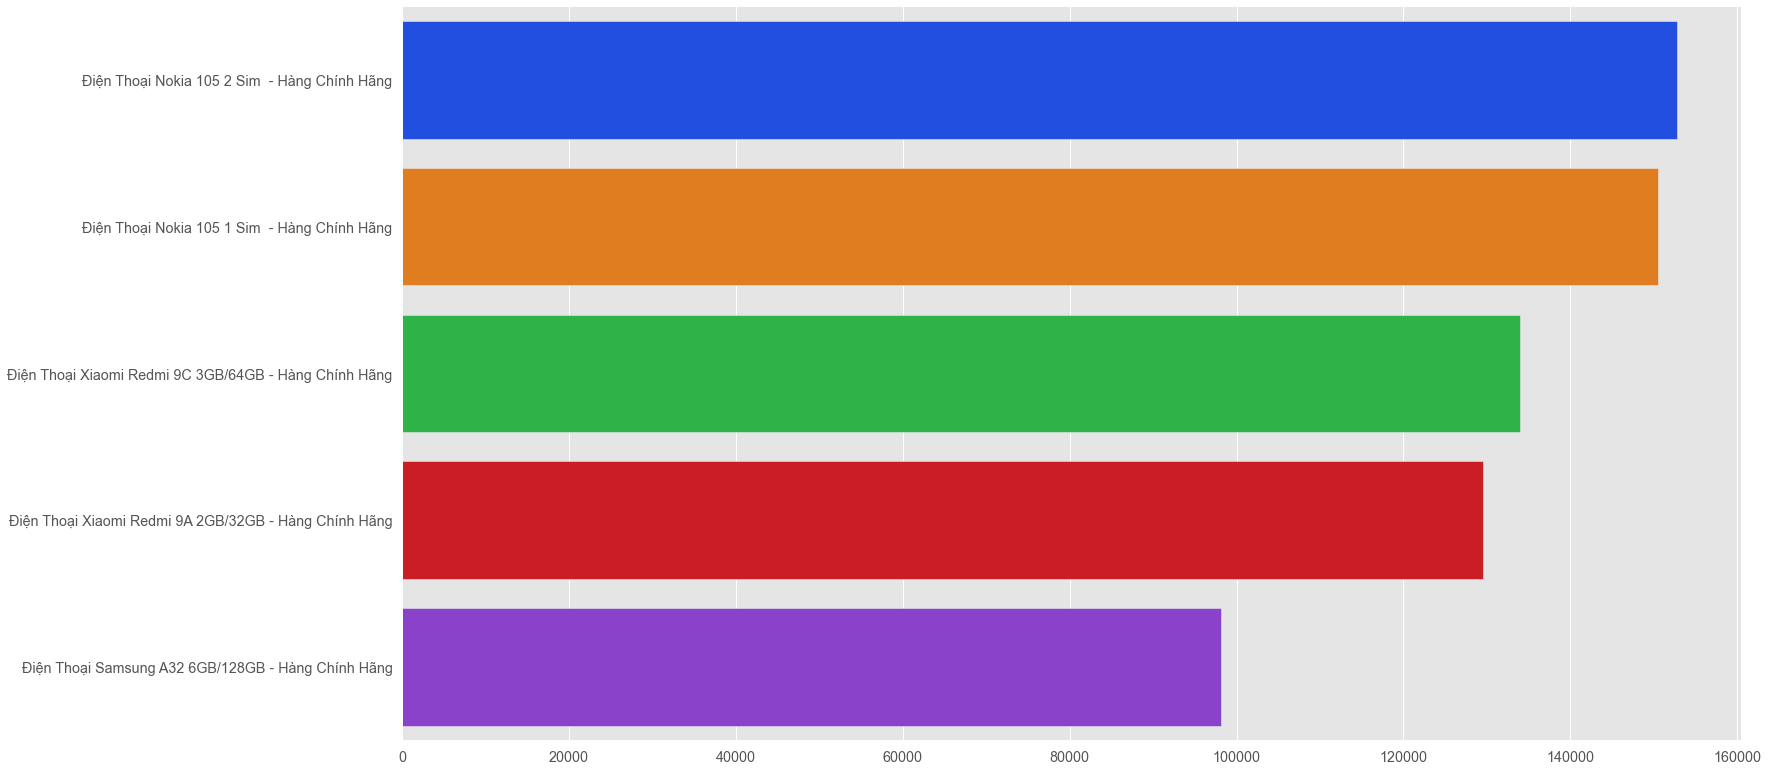

In [31]:
# Nokia is still popular among smartphones
ax = sns.barplot(x = top_5_product_liked.liked_count, y = top_5_product_liked.name, palette = 'bright')
plt.xlabel('')
plt.ylabel('')
plt.show()

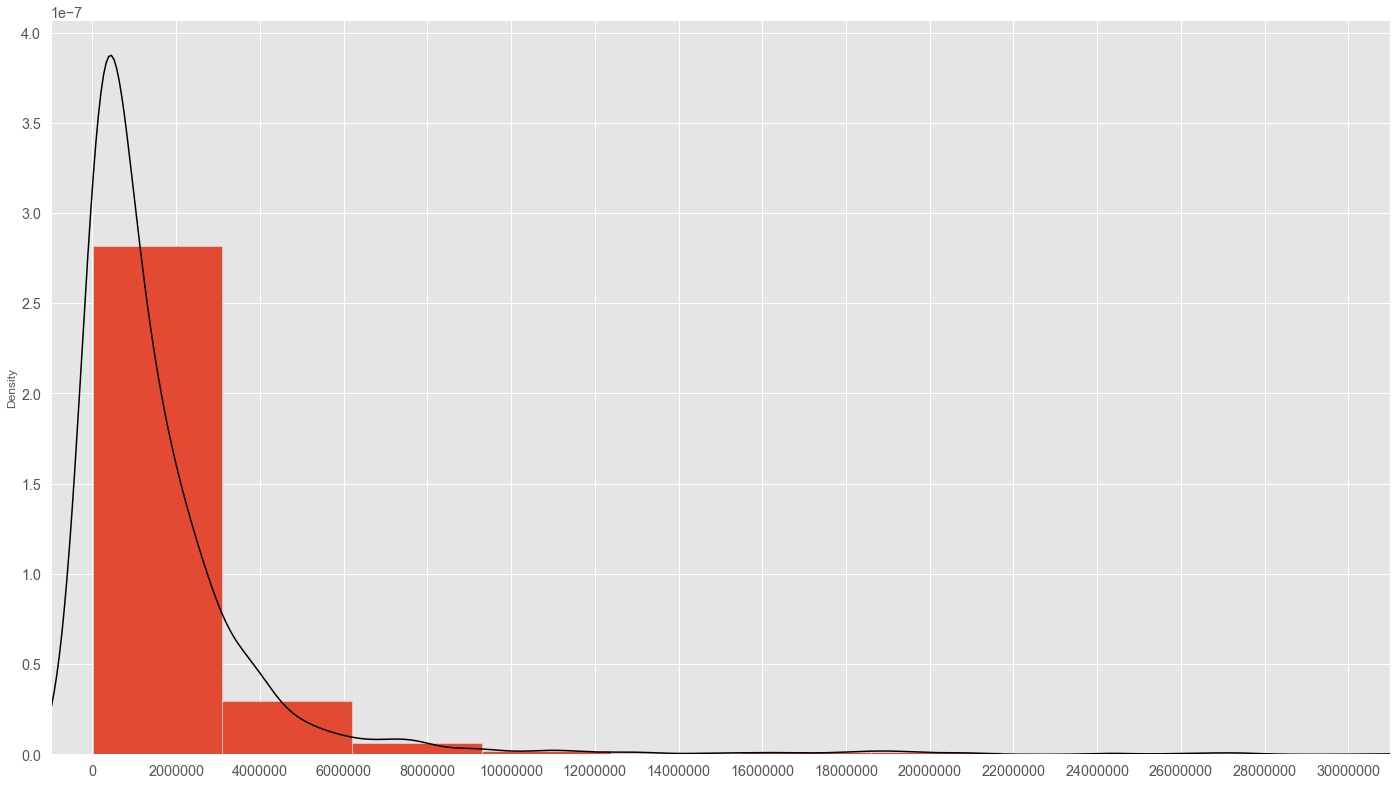

In [32]:
# Most of the product's price is around 2 million VND to 4 million VND, Huge amount of products are lower than 1 million VND
ax = product_full.discount_price.plot.hist(density = True, xlim = [-1000000,product_full.discount_price.max()])
ax.set_xticks(ticks = np.arange(0,product_full.discount_price.max(),2000000))
plt.ticklabel_format(style = 'plain', axis = 'x')
product_full.discount_price.plot.density(ax = ax, color = 'black')
plt.show()

In [33]:
# Take top brands based on their sold quantity
brand_list = brand_sold.brand.tolist()

In [34]:
top_popular_brand = product_full[product_full.brand.isin(brand_list)]

In [35]:
top_popular_brand

item_id    shop_id    shop_location  \
0      6685849255   65589552  TP. Hồ Chí Minh   
1      1236186398    1657913           Hà Nội   
4      7297413303   65589552  TP. Hồ Chí Minh   
6      3400182282   88201679           Hà Nội   
7       938839622    1657913           Hà Nội   
...           ...        ...              ...   
3050   1235062432   73406102  TP. Hồ Chí Minh   
3054   8303553266   43748089  TP. Hồ Chí Minh   
3057   3741337691   48782032  TP. Hồ Chí Minh   
3058  12347907444   48406301           Hà Nội   
3059  11371344688  134675802        Bình Định   

                                                   name    brand  \
0      Điện Thoại Samsung Galaxy M12  - Hãng Phân Ph...  SAMSUNG   
1     Điện Thoại Nokia 101,Nokia 100, Nokia 105 Zin ...    NOKIA   
4                        Điện thoại Samsung Galaxy A22   SAMSUNG   
6                                 Apple iPhone 11 128GB    APPLE   
7     Điện Thoại Nokia 1280 Zin Chính Hãng Màn Hình ...    NOKIA   
...                                                 ...      ...   
3050               NGAGE // Khung sườn Nokia N-gage QD     NOKIA   
3054  điện thoại Sony Xperia Z5 Premium Chính hãng, ...     SONY   
3057  điện thoại LG G3 "LG G3 F400 - LG G3 CAT6 { RA...       LG   
3058  Điện thoại Samsung Galaxy Z Flip 3 5G  Hàng ch...  SAMSUNG   
3059               Điện thoại Nokia 1661 đã qua sử dụng    NOKIA   

      sold_quantity  stock  discount_price  original_price discount  \
0             16339   2979         2890000         3490000      17%   
1             20415  27946           99000          110000      10%   
4              3270    232         4390000         5890000      25%   
6              5307    516        12090000        22990000      47%   
7             10156   8336          154000          165000       7%   
...             ...    ...             ...             ...      ...   
3050             10     20          249000               0      NaN   
3054            179  11537         1299000         2000000      43%   
3057            120    480         1250000               0      NaN   
3058              6    199        15990000        24990000      37%   
3059              8      2           90000               0      NaN   

      liked_count        gross  rating_star  number_of_ratings  \
0            4585  47219710000          4.9               2859   
1           32526   2021085000          4.6               6274   
4           13409  14355300000          4.9                770   
6           11593  64161630000          4.9               1391   
7           26578   1564024000          4.7               2994   
...           ...          ...          ...                ...   
3050            6      2490000          4.7                  3   
3054            6    232521000          5.0                  1   
3057          610    150000000          5.0                  2   
3058          197     95940000          5.0                  4   
3059            0       720000          4.2                  6   

                                     product_image_link  
0     https://cf.shopee.vn/file/132b023a3114a559d723...  
1     https://cf.shopee.vn/file/3a7fe3513b59468fc5d3...  
4     https://cf.shopee.vn/file/de40f4e661f2064711bf...  
6     https://cf.shopee.vn/file/e891e6f900bf8b1760a3...  
7     https://cf.shopee.vn/file/331c288812971ce367ad...  
...                                                 ...  
3050  https://cf.shopee.vn/file/445c498368893f0b8b4d...  
3054  https://cf.shopee.vn/file/1a12b57a78b691475360...  
3057  https://cf.shopee.vn/file/202c599f53d33f07ff56...  
3058  https://cf.shopee.vn/file/a0bd098c211df60bb0d3...  
3059  https://cf.shopee.vn/file/c6ef4f59473ddda2c315...  

[1959 rows x 15 columns]

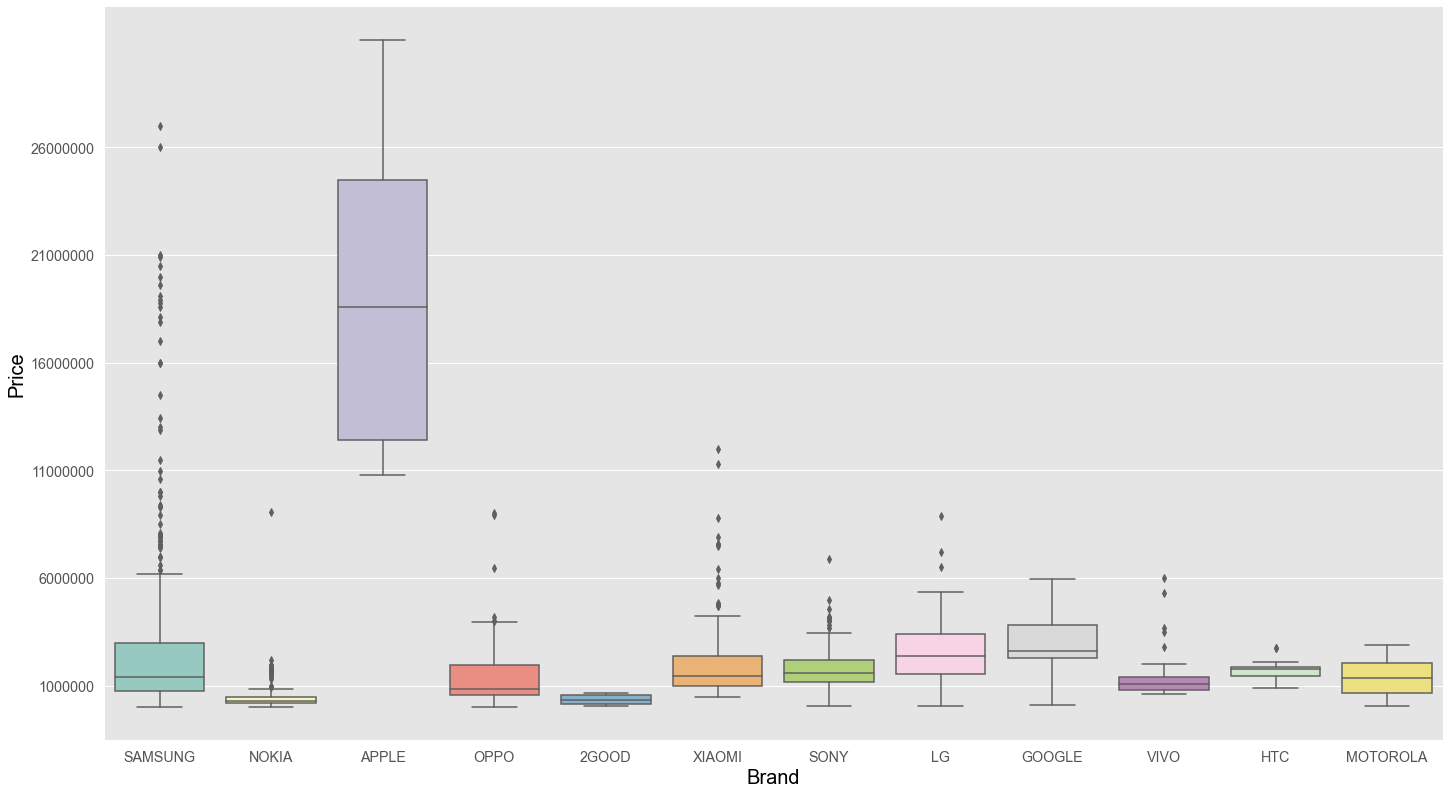

In [36]:
# We could see that Apple's product price range is between 11 million VND to around 24 million VND, Apple's products are for high-end customer segments
# Xiaomi and Samsung is still competing in the medium to low end customers, xiaomi phone's price is a bit lower compare to Samsung
# Highest Samsung phone price is over 26 million VND, meanwhile Xiaomi highest one is not higher than 20 million VND
ax = sns.boxplot(data = top_popular_brand, x = 'brand', y = 'discount_price', palette = 'Set3')
ax.set_yticks(ticks = np.arange(1000000,top_popular_brand.discount_price.max(),5000000))
plt.ticklabel_format(style = 'plain', axis = 'y')
ax.set_xlabel('Brand', fontsize = 20, color = 'black')
ax.set_ylabel('Price', fontsize = 20, color = 'black')
plt.show()

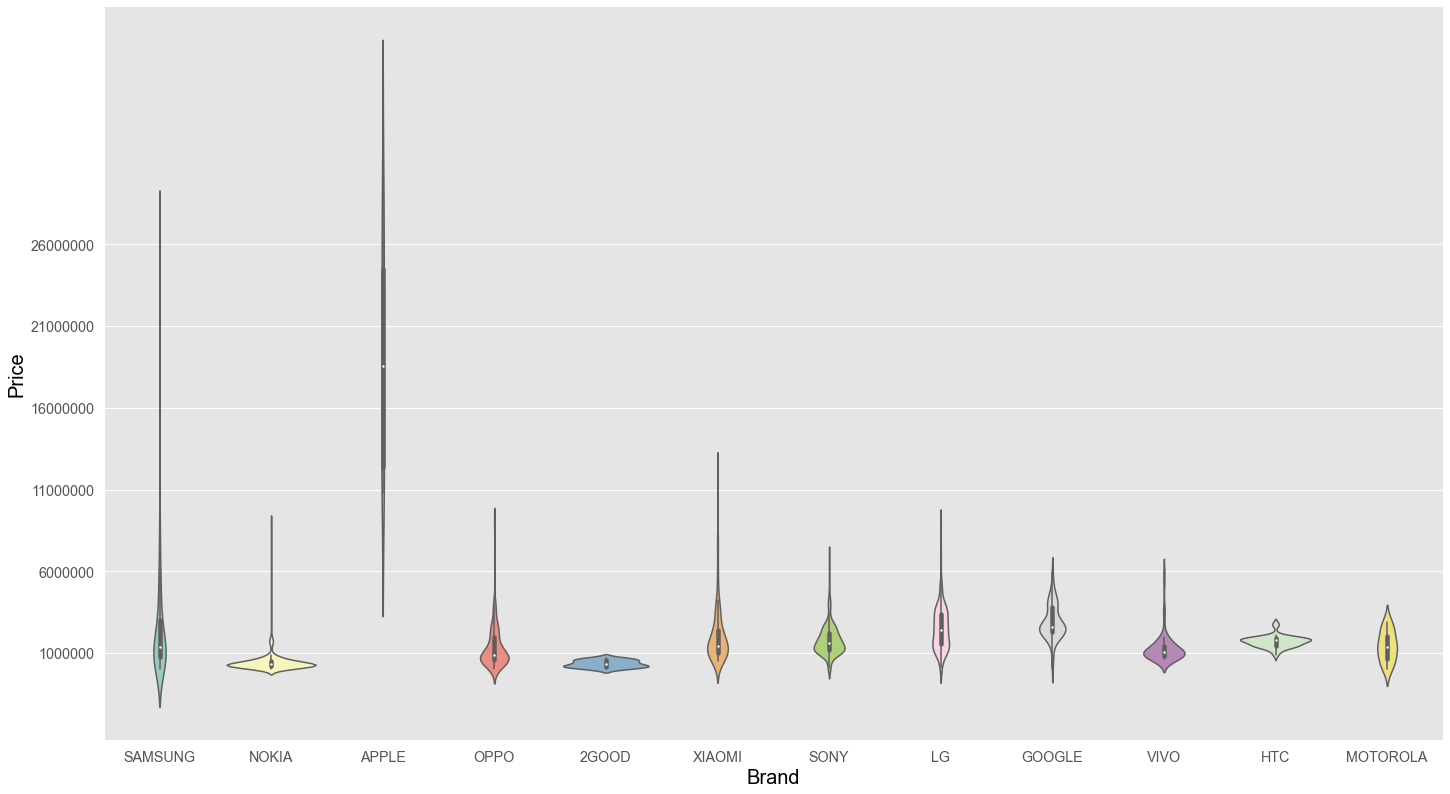

In [37]:
# Nokia's product price range is mostly under 1 million VND. 
ax = sns.violinplot(data = top_popular_brand, x = 'brand', y = 'discount_price', palette = 'Set3')
ax.set_yticks(ticks = np.arange(1000000,top_popular_brand.discount_price.max(),5000000))
plt.ticklabel_format(style = 'plain', axis = 'y')
ax.set_xlabel('Brand', fontsize = 20, color = 'black')
ax.set_ylabel('Price', fontsize = 20, color = 'black')
plt.show()

In [38]:
# Change discount column to int type
product_full.discount = product_full.discount.str[:-1].dropna().astype(int)

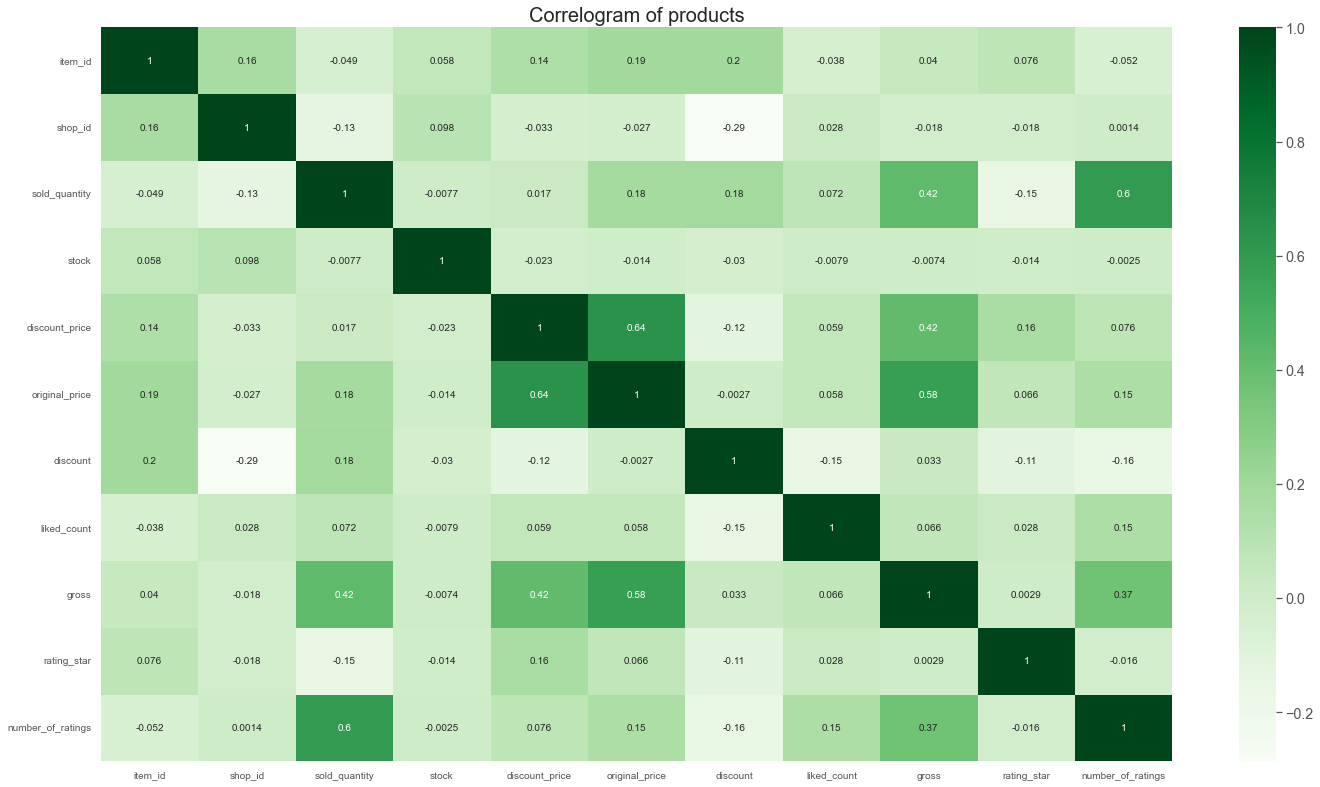

In [39]:
# Heatmap of Correlation coefficients of quantitative variables in product_full 
sns.heatmap(product_full.corr(), xticklabels = product_full.corr().columns, yticklabels = product_full.corr().columns, cmap = 'Greens', annot = True)
plt.title('Correlogram of products', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

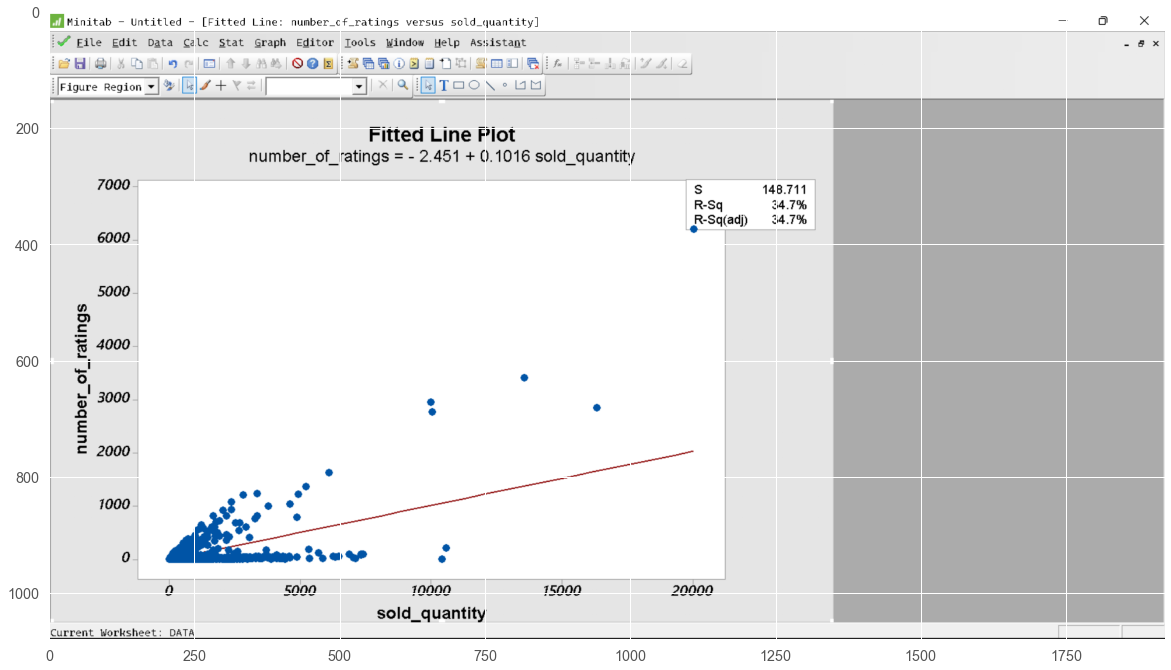

In [40]:
plt.figure(figsize = (20,12))
img = mpimg.imread("D:\Shopee_DienThoai\LinearRegression\sold_quantity and num_of_ratings.png")
imgplot = plt.imshow(img)
plt.show()

In [41]:
# Build model
lm = linear_model.LinearRegression()
model = lm.fit(pd.DataFrame(product_full.sold_quantity),pd.DataFrame(product_full.number_of_ratings))

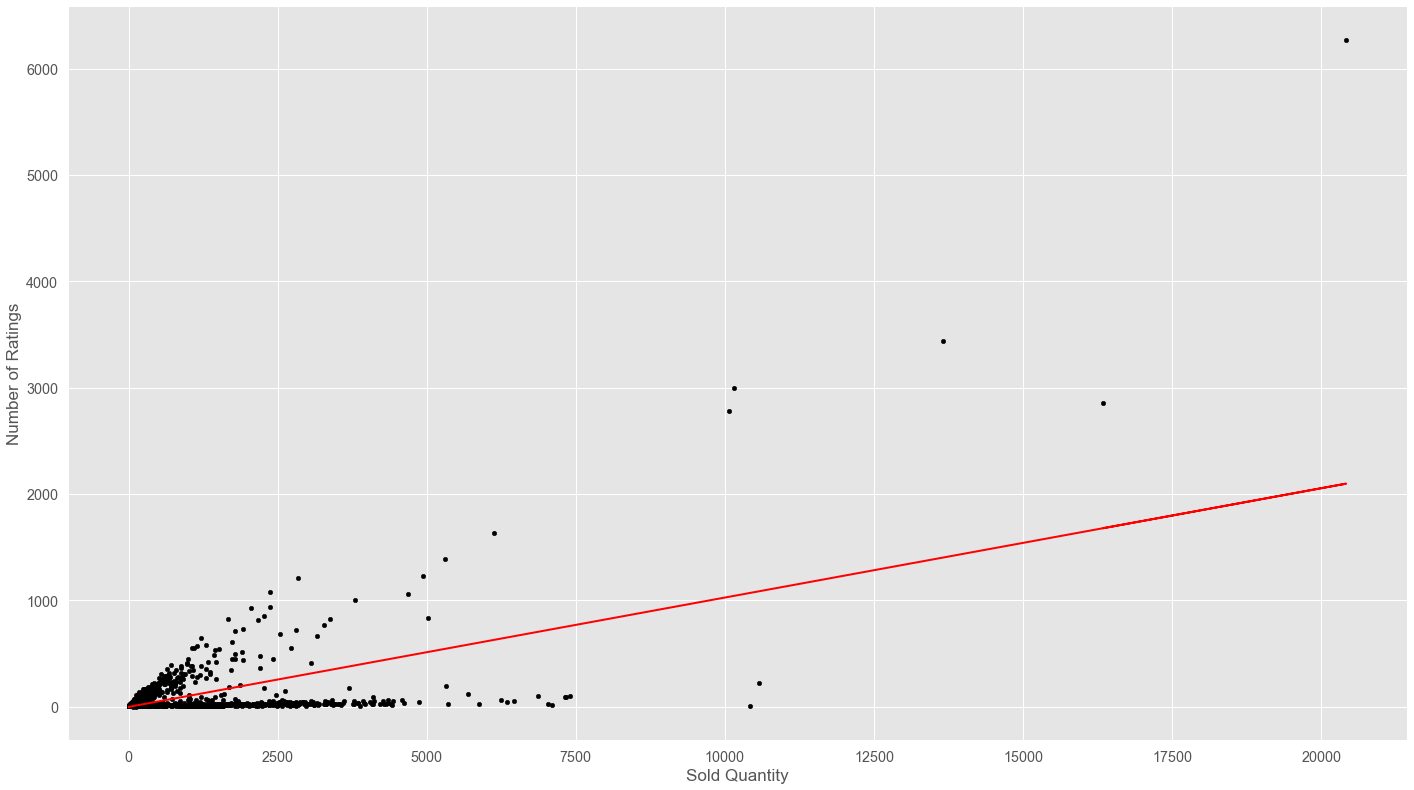

In [42]:
# As you can see here, the number of products sold affect slightly on the number of ratings
product_full.plot(kind = 'scatter', x = 'sold_quantity', y = 'number_of_ratings', color = 'black')
plt.plot(np.array(product_full.sold_quantity),model.predict(pd.DataFrame(product_full.sold_quantity)), color = 'red', linewidth = 2)
plt.xlabel('Sold Quantity', fontsize = 17)
plt.ylabel('Number of Ratings', fontsize = 17)
plt.show()

In [43]:
# Next, let's check if apple has some special relations between variables
apple = product_full[product_full.brand == 'APPLE'].drop(['item_id','shop_id'], axis = 1, inplace = False)
apple.corr()

sold_quantity     stock  discount_price  original_price  \
sold_quantity           1.000000  0.098724       -0.236375        0.145777   
stock                   0.098724  1.000000       -0.298614        0.027937   
discount_price         -0.236375 -0.298614        1.000000        0.286831   
original_price          0.145777  0.027937        0.286831        1.000000   
discount                0.465724  0.070778       -0.441522       -0.014842   
liked_count             0.938198  0.164324       -0.451531        0.010992   
gross                   0.844146  0.151656        0.163662        0.419127   
rating_star            -0.200378  0.202050       -0.405693        0.133699   
number_of_ratings       0.989611  0.063938       -0.321336        0.087711   

                   discount  liked_count     gross  rating_star  \
sold_quantity      0.465724     0.938198  0.844146    -0.200378   
stock              0.070778     0.164324  0.151656     0.202050   
discount_price    -0.441522    -0.451531  0.163662    -0.405693   
original_price    -0.014842     0.010992  0.419127     0.133699   
discount           1.000000     0.428982  0.125221    -0.429331   
liked_count        0.428982     1.000000  0.719080    -0.105006   
gross              0.125221     0.719080  1.000000    -0.265614   
rating_star       -0.429331    -0.105006 -0.265614     1.000000   
number_of_ratings  0.532691     0.954327  0.770176    -0.194187   

                   number_of_ratings  
sold_quantity               0.989611  
stock                       0.063938  
discount_price             -0.321336  
original_price              0.087711  
discount                    0.532691  
liked_count                 0.954327  
gross                       0.770176  
rating_star                -0.194187  
number_of_ratings           1.000000

In [44]:
# Fitting the model
lm = linear_model.LinearRegression()
model = lm.fit(pd.DataFrame(apple.liked_count),pd.DataFrame(apple.sold_quantity))

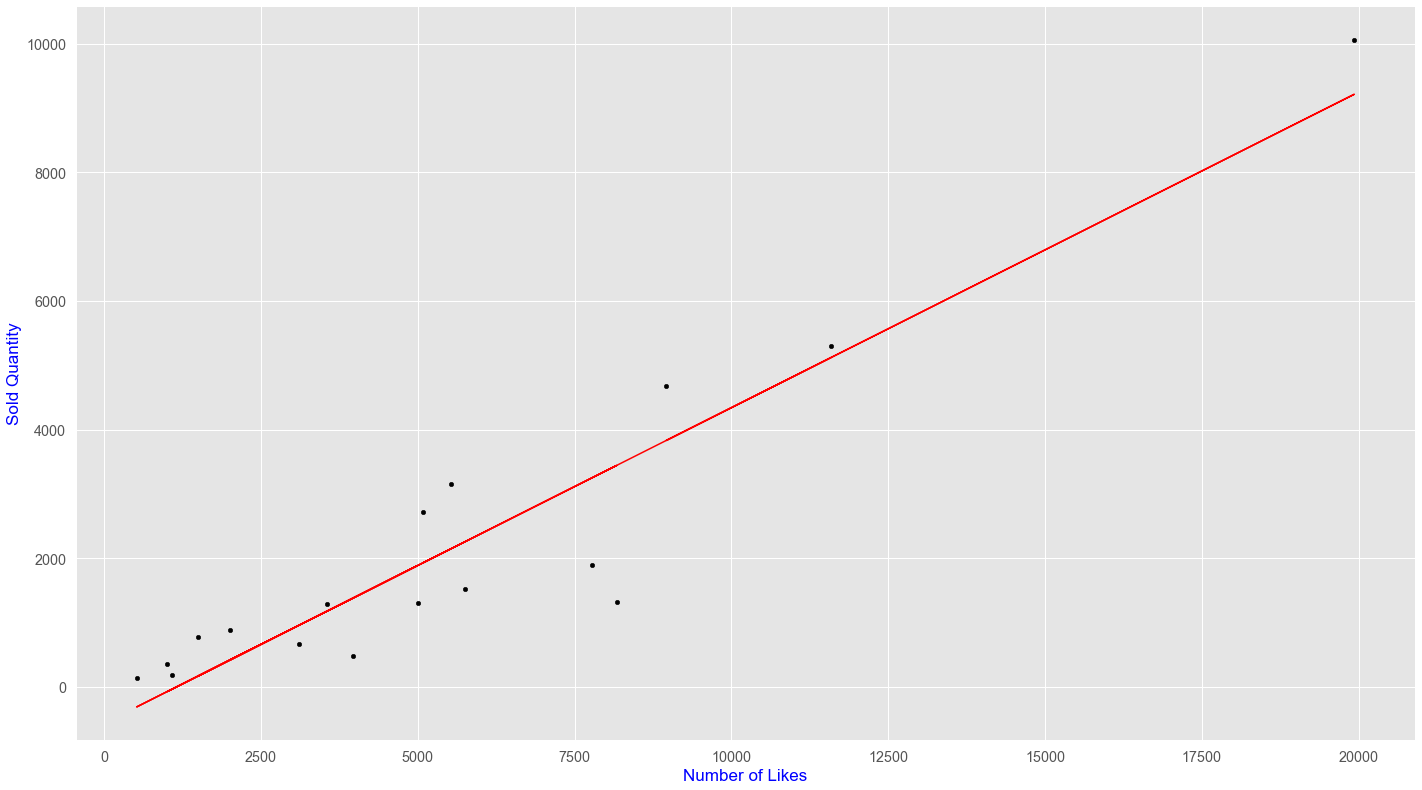

In [45]:
# The number of likes affect significantly on sold quantity variable.
# My theory is, if you are a shop selling iPhone products. You should seeks more likes in order to sell more phones.
apple.plot(kind = 'scatter', x = 'liked_count', y = 'sold_quantity', color = 'black')
plt.plot(apple.liked_count, model.predict(pd.DataFrame(apple.liked_count)), color = 'red')
plt.xlabel('Number of Likes', fontsize = 17, color = 'blue')
plt.ylabel('Sold Quantity', fontsize = 17, color = 'blue')
plt.show()

In [46]:
google = product_full[product_full.brand == 'GOOGLE'].drop(['item_id','shop_id'], axis = 1, inplace = False)
google.corr()

sold_quantity     stock  discount_price  original_price  \
sold_quantity           1.000000  0.853437       -0.433386        0.315717   
stock                   0.853437  1.000000       -0.448989        0.298109   
discount_price         -0.433386 -0.448989        1.000000        0.090018   
original_price          0.315717  0.298109        0.090018        1.000000   
discount                0.792668  0.858577       -0.313336        0.207570   
liked_count            -0.168203 -0.124846        0.008353       -0.222553   
gross                   0.947954  0.793769       -0.340724        0.380397   
rating_star            -0.203463 -0.220153        0.247079       -0.052887   
number_of_ratings      -0.092181 -0.213029       -0.187348        0.014519   

                   discount  liked_count     gross  rating_star  \
sold_quantity      0.792668    -0.168203  0.947954    -0.203463   
stock              0.858577    -0.124846  0.793769    -0.220153   
discount_price    -0.313336     0.008353 -0.340724     0.247079   
original_price     0.207570    -0.222553  0.380397    -0.052887   
discount           1.000000    -0.321377  0.752500    -0.238517   
liked_count       -0.321377     1.000000 -0.155898    -0.151630   
gross              0.752500    -0.155898  1.000000    -0.294570   
rating_star       -0.238517    -0.151630 -0.294570     1.000000   
number_of_ratings -0.493731    -0.077064 -0.064445    -0.057673   

                   number_of_ratings  
sold_quantity              -0.092181  
stock                      -0.213029  
discount_price             -0.187348  
original_price              0.014519  
discount                   -0.493731  
liked_count                -0.077064  
gross                      -0.064445  
rating_star                -0.057673  
number_of_ratings           1.000000

In [47]:
# Fitting the model 
lm = linear_model.LinearRegression()
model = lm.fit(pd.DataFrame(google.sold_quantity),pd.DataFrame(google.stock))

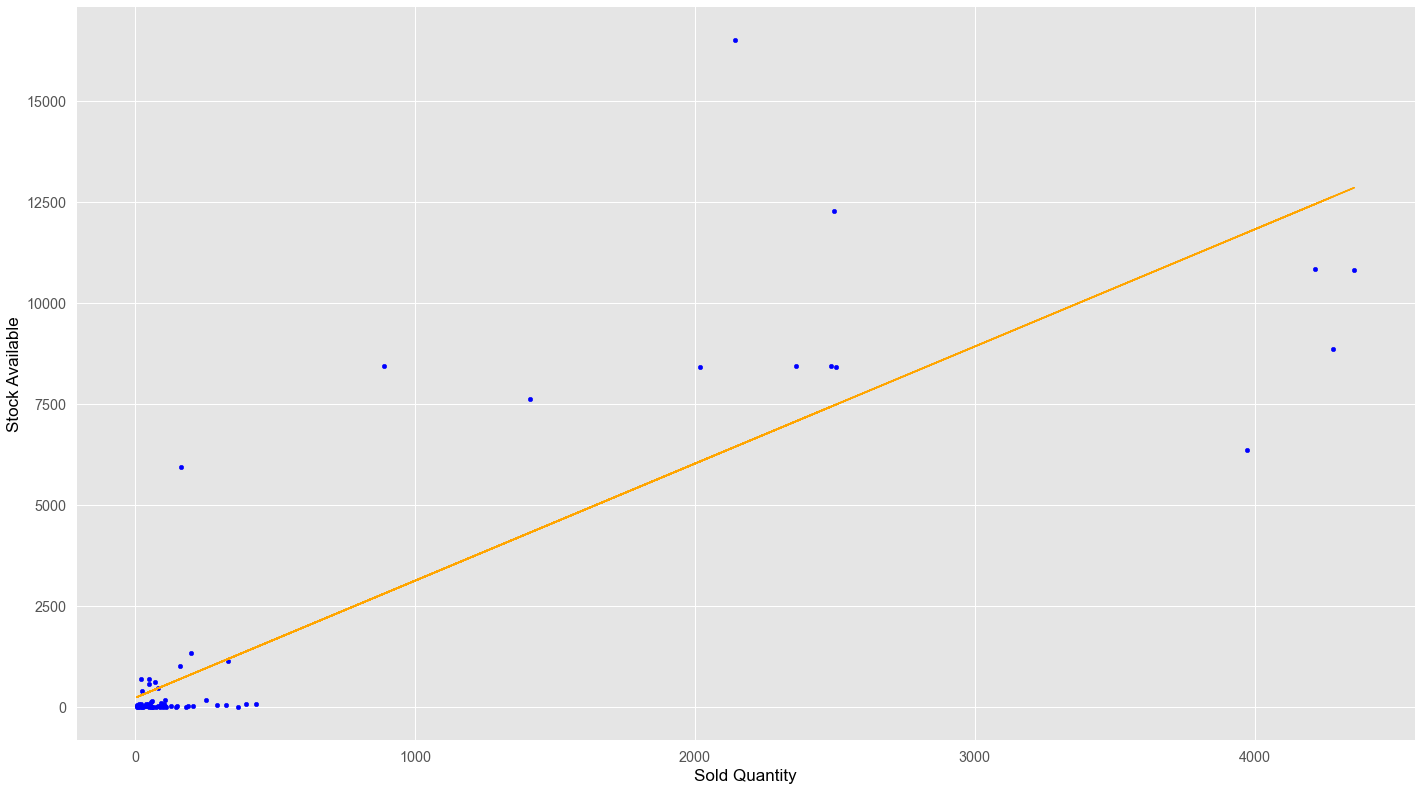

In [48]:
google.plot(kind = 'scatter',x = 'sold_quantity', y = 'stock', color = 'blue')
plt.plot(np.array(google.sold_quantity), model.predict(pd.DataFrame(google.sold_quantity)), color = 'orange')
plt.xlabel('Sold Quantity', fontsize = 17, color = 'black')
plt.ylabel('Stock Available', fontsize = 17, color = 'black')
plt.show()

In [49]:
# Merge data and comment datasets
comment_rating = pd.merge(product_rating,product_data, on = 'item_id')[['item_id','order_id','cmt_id','shop_id','brand','liked_count','rating_star_x','rating_star_y','comment']]
comment_rating.brand = comment_rating.brand.str.upper()

In [50]:
comment_rating

item_id         order_id      cmt_id    shop_id    brand  \
0       6685849255  112539818117052  9103860935   65589552  SAMSUNG   
1       6685849255  111058415139684  8953928762   65589552  SAMSUNG   
2       6685849255  109996550130678  8930604293   65589552  SAMSUNG   
3       6685849255  110883295199542  8924673029   65589552  SAMSUNG   
4       6685849255  106117412399209  8547042012   65589552  SAMSUNG   
...            ...              ...         ...        ...      ...   
58791  13039831746   93415118458853  6978837835  576524321    NOKIA   
58792  13039831746   93911186396039  7081623182  576524321    NOKIA   
58793  13039831746   93880558359377  7041848132  576524321    NOKIA   
58794  13039831746   93099213104339  6932600543  576524321    NOKIA   
58795  13039831746   92231536010116  6826918356  576524321    NOKIA   

       liked_count  rating_star_x  rating_star_y  \
0             4585              3       4.941713   
1             4585              5       4.941713   
2             4585              5       4.941713   
3             4585              4       4.941713   
4             4585              5       4.941713   
...            ...            ...            ...   
58791           13              5       4.578947   
58792           13              5       4.578947   
58793           13              5       4.578947   
58794           13              5       4.578947   
58795           13              5       4.578947   

                                                 comment  
0      Chất lượng sản phẩm:tốt\nTính năng nổi bật:tốt...  
1      Hàng Ok, đóng gói cẩn thận, nhìn chắc chắn đan...  
2      Điện thoại rất tốt, pin trâu, đủ dùng cho các ...  
3      Mua cho ba\nĐặt màu đen giao màu xanh\nThôi cứ...  
4      Chất lượng sản phẩm:Tốt\nTính năng nổi bật:Pin...  
...                                                  ...  
58791                                                NaN  
58792                                                NaN  
58793                                                NaN  
58794                                                NaN  
58795                                                NaN  

[58796 rows x 9 columns]

In [51]:
# Use WordCloud to extract keywords
comment = WordCloud(background_color = 'white', max_words = 40).generate(' '.join(comment_rating.comment.dropna().astype(str)))

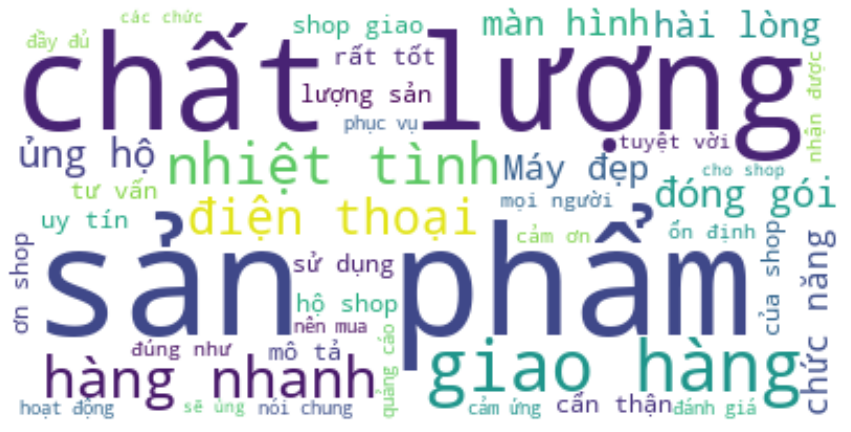

In [52]:
plt.figure(figsize = (15,10))
plt.imshow(comment, interpolation = 'bilinear')
plt.axis('off')
plt.show()

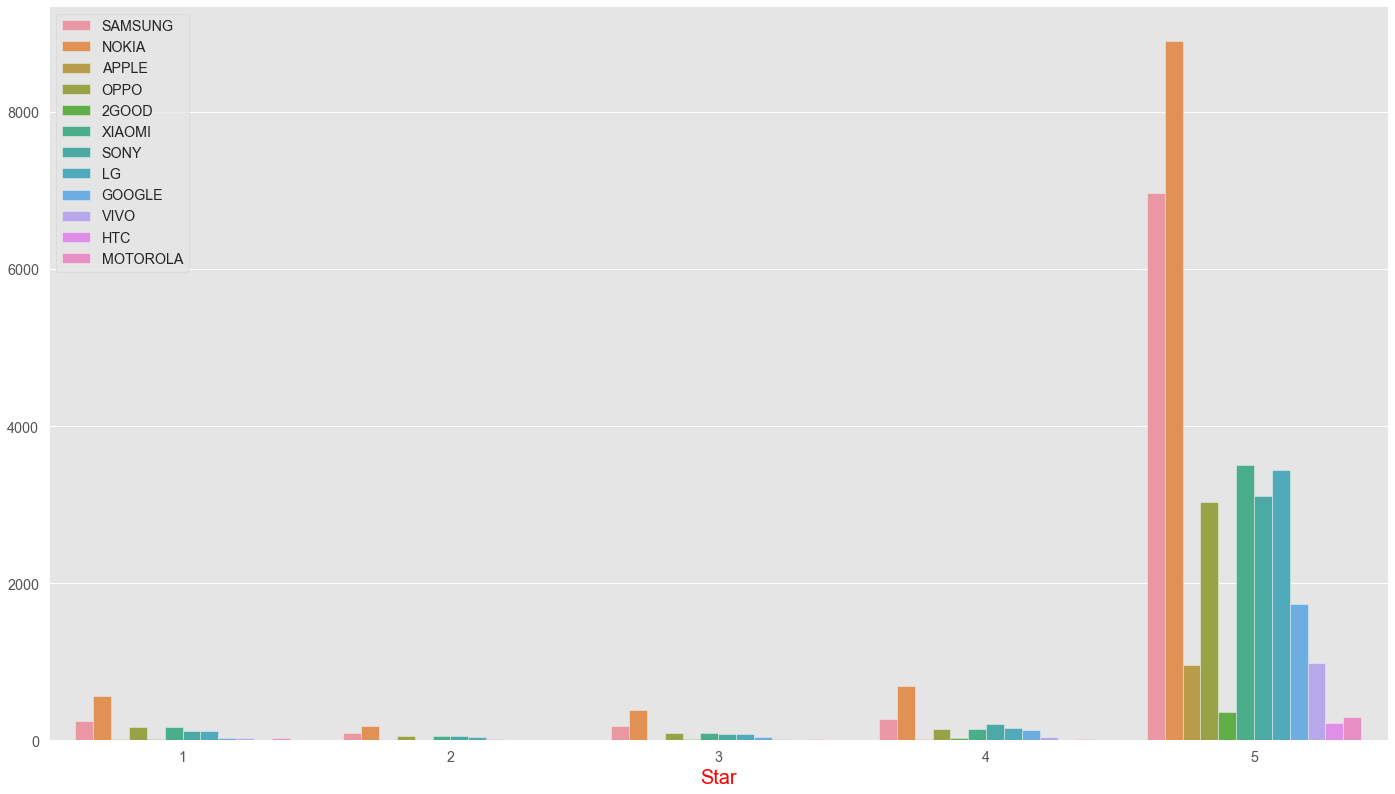

In [53]:
# Now, let's see the number of star ratings based on brand
plt.figure(figsize = (24,13.5))
ax = sns.countplot(x = 'rating_star_x', data = comment_rating[comment_rating.brand.isin(brand_list)], hue = 'brand')
ax.set_xlabel('Star', fontsize = 20, color = 'red')
ax.set_ylabel('')
ax.legend(loc = 'upper left')
plt.show()

In [54]:
# Finally, let's make a function to show what products to buy in a price range. I sorted based on number of ratings and stars.
# This function can print the name, brand and also the image of the products.
# Come with the price of the product compare to average price in that price range in the right side of the image
def show_phone(a,b):
    print(tabulate(
        [['Product Name',''.join(product_full[(product_full.discount_price > a) & ( product_full.discount_price < b)].sort_values(['number_of_ratings','rating_star'], ascending = False).name.head(1))],
         ['Brand',''.join(product_full[(product_full.discount_price > a) & ( product_full.discount_price < b)].sort_values(['number_of_ratings','rating_star'], ascending = False).brand.head(1))]]
                    ))
    image = io.imread(''.join(product_full[(product_full.discount_price > a) & ( product_full.discount_price < b)].sort_values(['number_of_ratings','rating_star'], ascending = False).product_image_link.head(1)))
    data = pd.DataFrame(data = {'Product Price':product_full[(product_full.discount_price > a) & ( product_full.discount_price < b)].sort_values(['number_of_ratings','rating_star'], ascending = False).discount_price.head(1).values,
                            'Average Price Segment':round(product_full[(product_full.discount_price > a) & ( product_full.discount_price < b)].sort_values(['number_of_ratings','rating_star'], ascending = False).discount_price.mean(),0)}, 
                    index = [product_full[(product_full.discount_price > a) & ( product_full.discount_price < b)].sort_values(['number_of_ratings','rating_star'], ascending = False).name.head(1)],
                    columns = {'Product Price','Average Price Segment'})
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.axis('off')
    plt.subplot(1,2,2)
    ax = sns.barplot(data = data, palette = 'Set2')
    plt.ticklabel_format(style = 'plain', axis = 'y')
    plt.xticks(rotation = 0)
    plt.title('Price Comparison between this Product Price and average Price Segment', fontsize = 22, color = 'brown')
    ax.bar_label(ax.containers[0], label_type = 'edge',fmt='%0.0f', fontsize = 20, color = 'red')
    ax.margins(y = 0.1)
    plt.show()

------------  ---------------------
Product Name  Apple iPhone 13 128GB
Brand         APPLE
------------  ---------------------


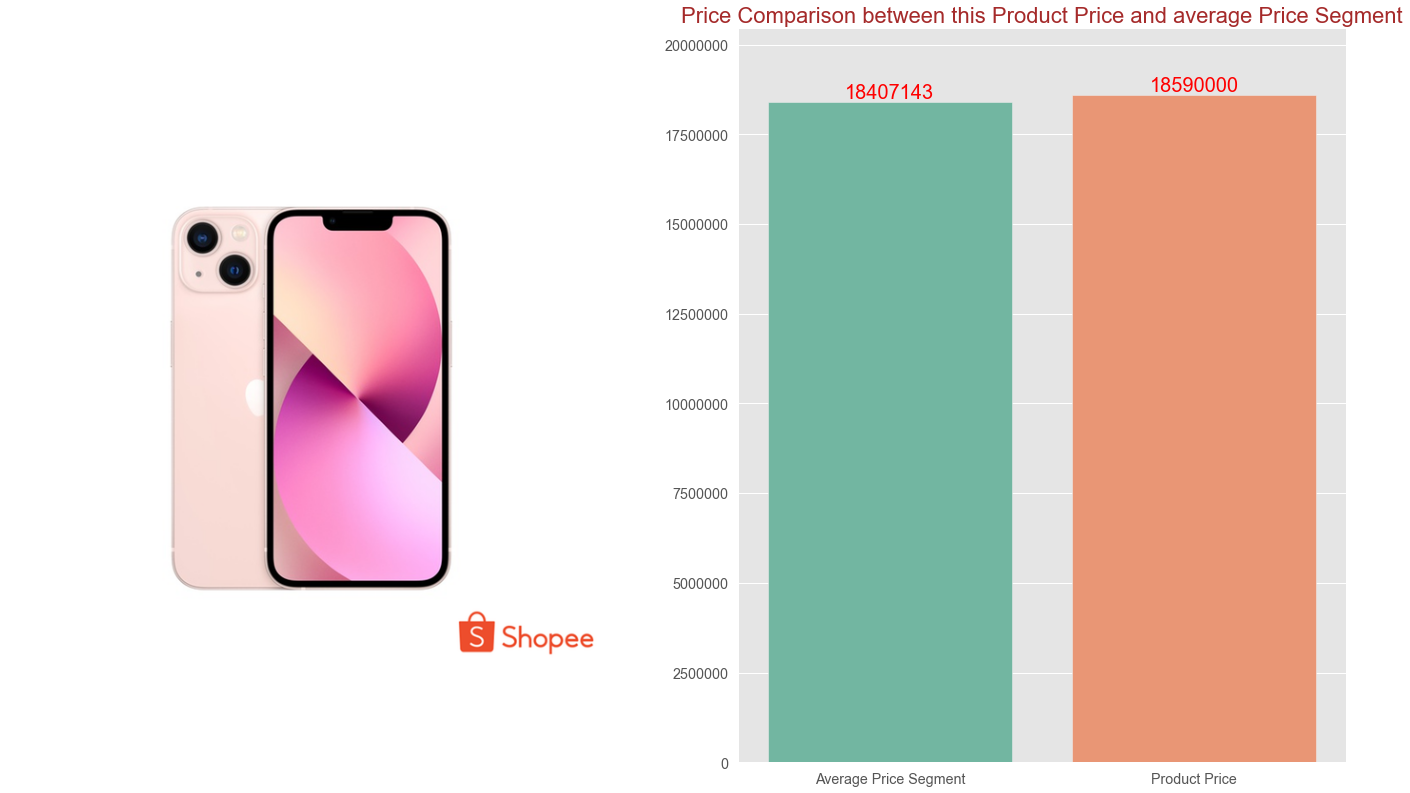

In [55]:
# For example, let's take a look at the best phone in price range from 17 million VND to 19 million VNDs
show_phone(17000000,19000000)

------------  --------------------------------------------------------------------------------
Product Name  Điện Thoại Nokia 101,Nokia 100, Nokia 105 Zin Chính Hãng, Được Chọn Kèm Phụ Kiện
Brand         NOKIA
------------  --------------------------------------------------------------------------------


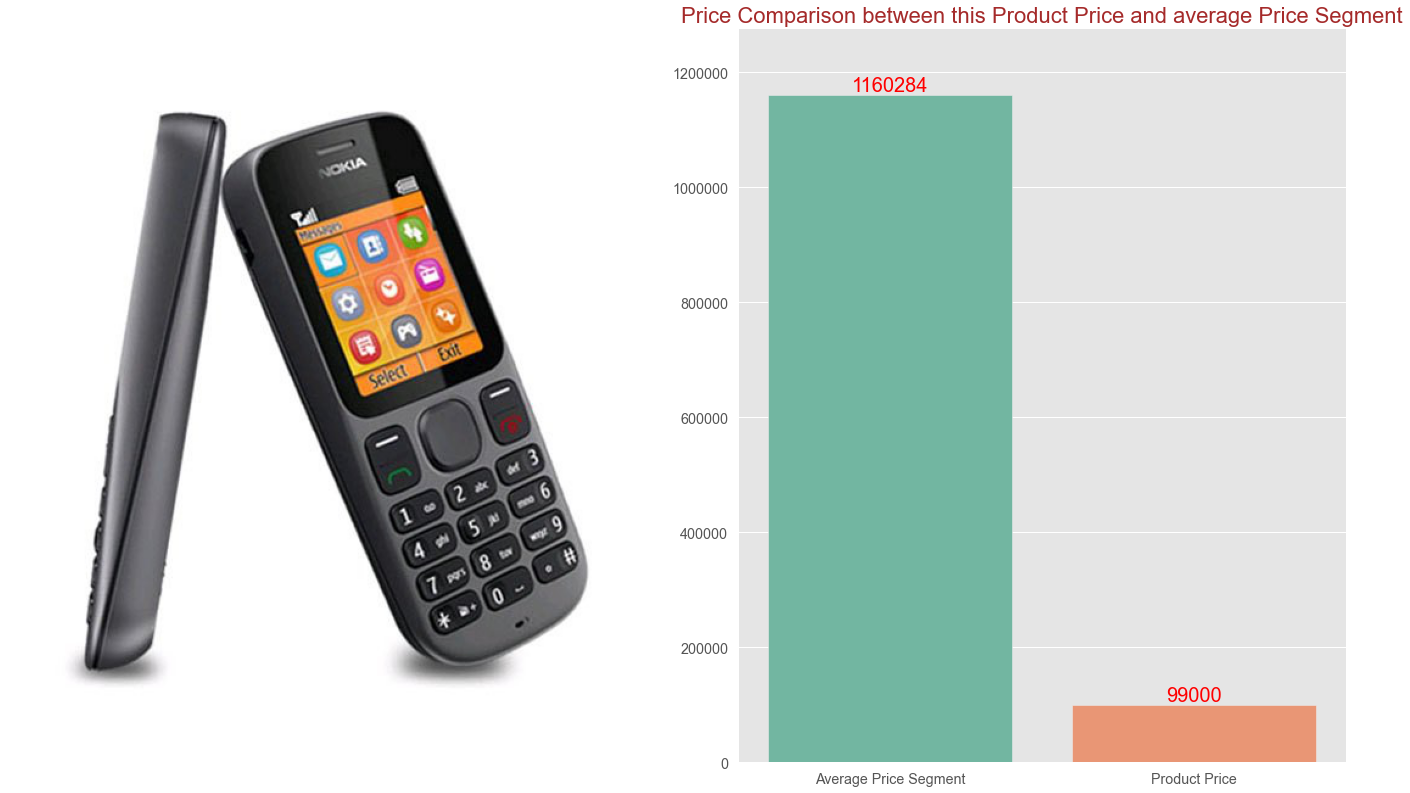

In [56]:
# Now Suppose you only have less than 5 million VND, what should you buy
show_phone(0,5000000)

------------  ----------------------------------------------------------
Product Name  Điện Thoại Samsung Galaxy M12  - Hãng Phân Phối Chính Thức
Brand         SAMSUNG
------------  ----------------------------------------------------------


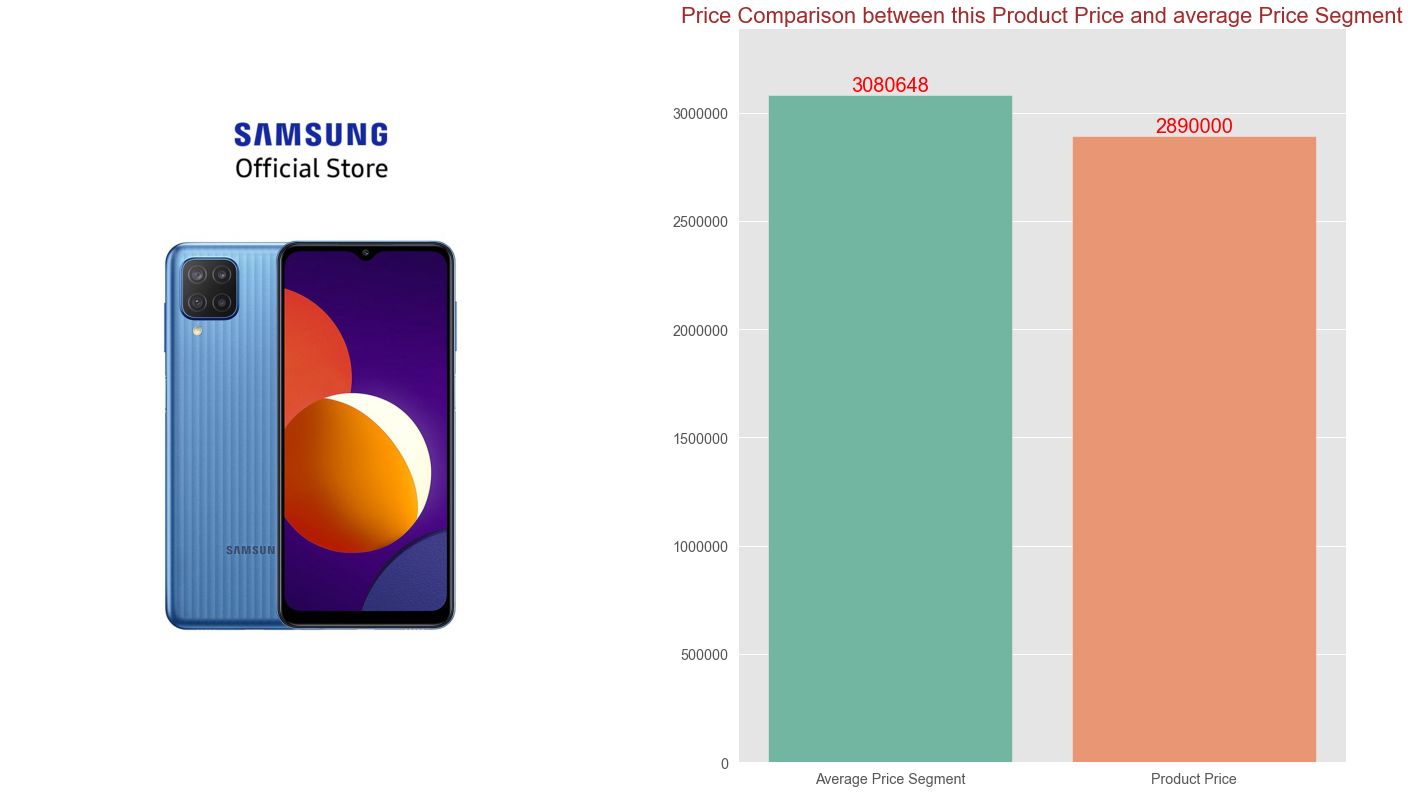

In [57]:
# It's a Samsung phone, the price is 2.890.000 VND
show_phone(2000000,5000000)

------------  ---------------------
Product Name  Apple iPhone 13 256GB
Brand         APPLE
------------  ---------------------


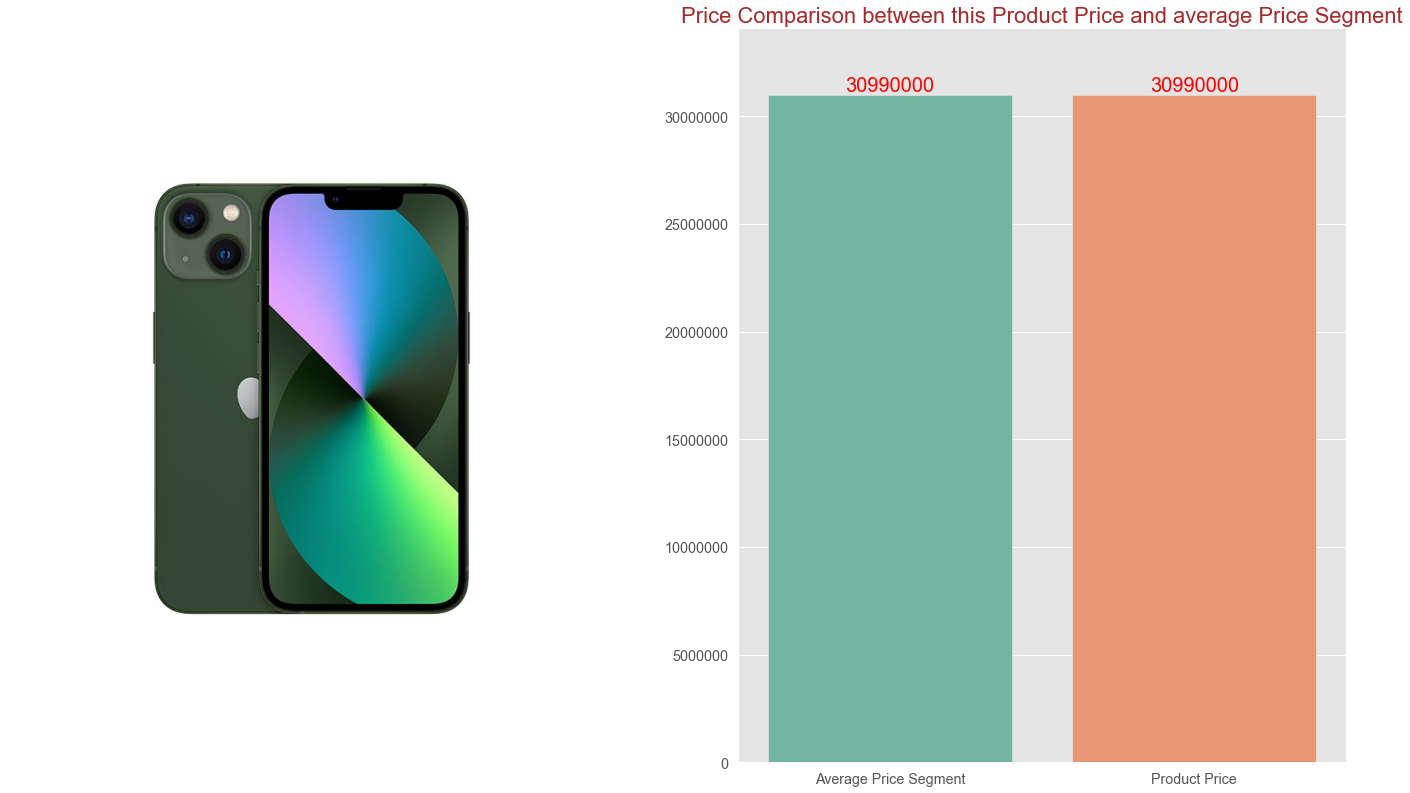

In [58]:
# Funnily, it's Apple iPhone again
# As shown earlier, Apple iPhone 13 128 GB cost around 19 million VND
# This phone has 2 times the storage but cost approximately 2 times the price, Apple's products are surely for high-end customers
show_phone(30000000,60000000)